In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('loans_full_schema.csv')
dataset.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## I) Descibe the dataset

In [3]:
len(dataset)

10000

In [4]:
dataset.isnull().any()

emp_title                            True
emp_length                           True
state                               False
homeownership                       False
annual_income                       False
verified_income                     False
debt_to_income                       True
annual_income_joint                  True
verification_income_joint            True
debt_to_income_joint                 True
delinq_2y                           False
months_since_last_delinq             True
earliest_credit_line                False
inquiries_last_12m                  False
total_credit_lines                  False
open_credit_lines                   False
total_credit_limit                  False
total_credit_utilized               False
num_collections_last_12m            False
num_historical_failed_to_pay        False
months_since_90d_late                True
current_accounts_delinq             False
total_collection_amount_ever        False
current_installment_accounts      

In [5]:
dataset.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

## Description
There are total 10,000 entries in the dataset with 55 variables or features. There are 10 columns within this dataset which contain a null value. Some of the null values make sense such as annual_income_join or verification_income_join because this indicates that the person might have made an individual loan. The dataset primarily has 3 data-types i.e integer, float and objects. 

The dataset also has a combination of categorical (both ordinal and nominal) as well as numerical (continuous and discrete) data. Some examples of ordinal - grade, sub_grade; nominal - homeownership, state; continuous - interest rate, annual_income; discrete - months_since_90d_late).

## Issues
The dataset has a lot of features that have null values in them and even though some of them make sense, some of the feature values could have been divised in such a way that they wouldn't have been null. For example, 'months_since_90d_late' could have the value of 0 for the individuals who are not late since it's been 0 months since they have been 90 days late or it could have been set to -1 to indicate that they are infact not late. 

The dataset could also have been divided into two datasets based on whether the application was for an individual role or joint as a single dataset gives rise to redundant features such as 'annual_income', 'annual_income_joint'. Also 10,000 entries seem less for a dataset which has 55 features. 

## II) Data Visualizations

### a) Number of Individuals per loan_status

In [6]:
np.unique(dataset['loan_status'])

array(['Charged Off', 'Current', 'Fully Paid', 'In Grace Period',
       'Late (16-30 days)', 'Late (31-120 days)'], dtype=object)

In [7]:
loan_stat = ['Charged Off', 'Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']
count = []
for i in loan_stat:
    count.append(len(dataset[dataset['loan_status'] == i]))


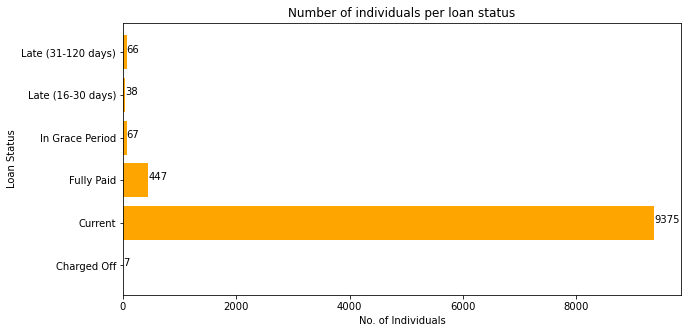

In [8]:
fig = plt.figure(figsize = (10, 5))
 
plt.barh(loan_stat, count, color ='orange')
 
plt.xlabel("No. of Individuals")
plt.ylabel("Loan Status")
plt.title("Number of individuals per loan status")

for index, value in enumerate(count):
    plt.text(value, index, str(value))
plt.show()

##### Observation
Out of the total 10,000 individuals, it seems that the maximum number of individuals are either currently paying off the loan (9375 individuals) or have already paid off the loan (447 individuals). Less than 200 individuals are late in paying off their loans

### b) Top 10 job titles with maximum number of credit inquiries (Which job titles had the most credit inquiries?)

In [9]:
frequent_job_title = dataset['emp_title'].value_counts().index.tolist()[:10]
frequent_job_title

['manager',
 'owner',
 'teacher',
 'driver',
 'sales',
 'registered nurse',
 'rn',
 'supervisor',
 'truck driver',
 'office manager']

In [10]:
count2 = []
for i in frequent_job_title:
    df = dataset[dataset['emp_title']==i]
    c = len(df[df['months_since_last_credit_inquiry']!=0])
    count2.append(int(c))
    
count2

[198, 184, 189, 110, 91, 85, 71, 77, 55, 56]

In [11]:
df2 = pd.DataFrame()
df2['Job_title'] = frequent_job_title
df2['No_of_individuals_inquired'] = count2
df2 = df2.sort_values('No_of_individuals_inquired', ascending=False)
df2.head()

,Job_title,No_of_individuals_inquired
0,manager,198
2,teacher,189
1,owner,184
3,driver,110
4,sales,91


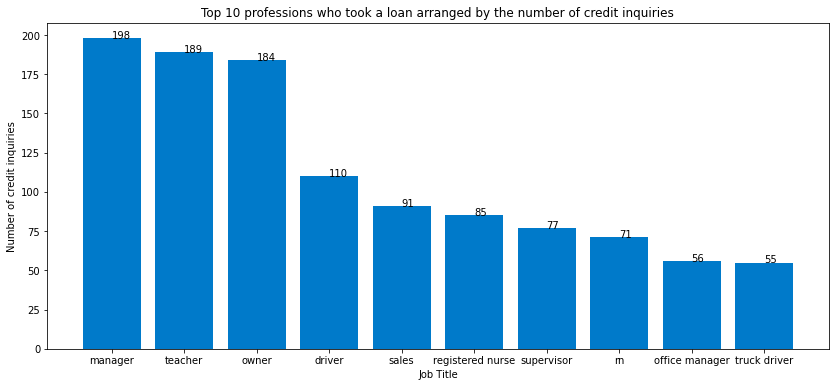

In [12]:
fig = plt.figure(figsize = (14, 6))
 
plt.bar(df2['Job_title'], df2['No_of_individuals_inquired'], color =[0,0.4770, 0.7910])
 
plt.xlabel('Job Title')
plt.ylabel("Number of credit inquiries")
plt.title("Top 10 professions who took a loan arranged by the number of credit inquiries")

for index, value in enumerate(df2['No_of_individuals_inquired']):
    plt.text(index, value, str(value))
plt.show()

#### Observation
The graph shows the first top 10 job titles who took a loan and then among these top 10 job titles, it ranks the titles according to the number of credit inquiries for each profession. 

We can see from the plot that the managers were inquired the most, followed by teachers and owners. This might also be an indication that among all the job types, managers take the most number of loans as the individuals' credits are inquired only when they have applied for a loan. 

### c) Number of applicants per loan type

In [13]:
loan_type = np.unique(dataset['application_type'])
loan_type

array(['individual', 'joint'], dtype=object)

In [14]:
ind = []
joint = []

for i in frequent_job_title:
    df = dataset[dataset['emp_title']==i]
    ind.append(len(df[df['application_type'] == 'individual']))
    joint.append(len(df[df['application_type'] == 'joint']))
    

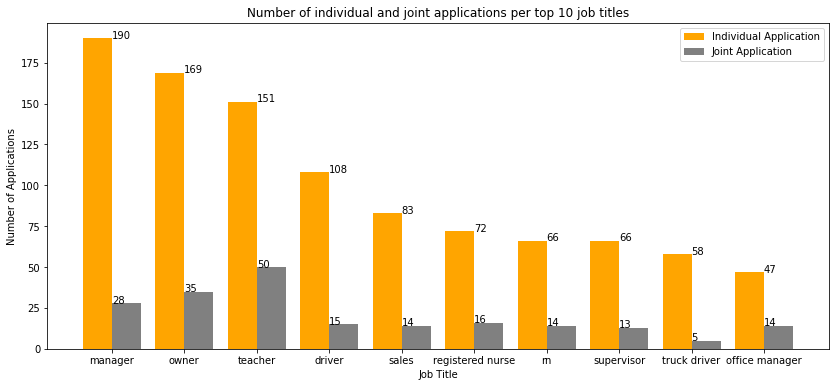

In [15]:
fig = plt.figure(figsize = (14, 6))

X_axis = np.arange(len(frequent_job_title))
  
plt.bar(X_axis - 0.2, ind, 0.4, label = 'Individual Application', color='orange')
plt.bar(X_axis + 0.2, joint, 0.4, label = 'Joint Application', color='grey')
  
plt.xticks(X_axis, frequent_job_title)
plt.xlabel("Job Title")
plt.ylabel("Number of Applications")
plt.title("Number of individual and joint applications per top 10 job titles")
plt.legend()

for index, value in enumerate(ind):
    plt.text(index, value, str(value))
    
for index, value in enumerate(joint):
    plt.text(index, value, str(value))
    
plt.show()

#### Observation

The people seem to prefer taking an idividual loan application over joint loan application irrespective of the job title.

The plot shows the distribution of individuals based on their job type and loan application type. This plot is also an indication that the managers take the most amount of loans

### d) Percentage of individuals belonging to different home ownership types

In [16]:
home = np.unique(dataset['homeownership'])
home

array(['MORTGAGE', 'OWN', 'RENT'], dtype=object)

In [17]:
count = []

for i in home:
    count.append(len(dataset[dataset['homeownership'] == i]))
    
count

[4789, 1353, 3858]

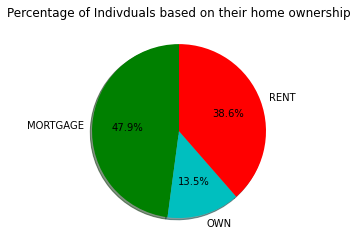

In [18]:
import matplotlib.pyplot as plt

cols = ['g','c','r']

plt.pie(count, labels=home, colors=cols, startangle=90, shadow= True, autopct='%1.1f%%')

plt.title('Percentage of Indivduals based on their home ownership')

plt.show()

#### Observation
The pie chart gives the distribution of the indivduals based on the ownership of their homes. Among all the individuals taking a loan, about 50% of the individuals already seem to have a mortgage on their homes.

### e) Analyizing the loan amount and interest_rate

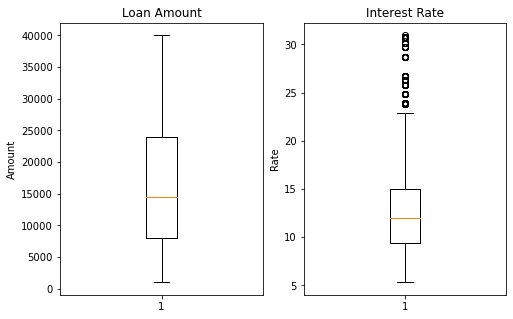

In [19]:
fig = plt.figure(figsize =(8, 5))
 
plt.subplot(1, 2, 1) 
plt.boxplot(dataset['loan_amount'])
plt.title('Loan Amount')
plt.ylabel('Amount')

plt.subplot(1, 2, 2)
plt.boxplot(dataset['interest_rate'])
plt.title('Interest Rate')
plt.ylabel('Rate')
 
plt.show()

#### Observation

This is boxplot for analyzing the loan amount and interest rate. The loan amount differs from a little over 0 to 40,000 with the median loan amount being 15,000. But we can say that the maximum anounts of loan are in the range of about 7500 to 25,000. There are no outliers in this distribution, that is no exceptional cases. The distribution is also right skewed, that means majority of the data is located in the lower range of the amount. The distribution is also more spread than the interest_rate, that is there is more variation.

The interest rate ranges between 5 to about 23 for maximum number of individuals and primarily lies between 5 and 15. There are multiple outliers in this distribution, that is more than 20 30 individuals who have an interest rate higher than 23, some up till more than 30 interest rate. The median value looks like about 12. The distribution is also more compact and is right skewed, that means more individuals lie on the lower side of the spectrum

## III) Predicting the interest rate

I experimented on various models for predicting the interest rate for an individual. The models tried on were Linear Regression, Lasso Regression, Decision Tree, Random Forest, kNN, SVM, and Neural Nets. (Neural Nets is in the google colab link as my Jupyter was not supporting keras). 

Among all the models studied, Random Forest, Decision Tree, and Neural Nets seem to work the best.

Preprocessing - There were many columns with the Nan values. I had to first convert these values to 0. There was also categorical data present in the dataset which had to be encoded into a numerical value so that the dataset could work on maximum numbers of algorithms without any problem. Feature selection was then done to select the best features that would enhance the model. Root Mean Squared Error is the evaluation metric used.

The approach starts with the basic model with a high RMSE and ends with the Random Forest model which works best for the dataset

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [21]:
dataset = pd.read_csv('loans_full_schema.csv')
dataset.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [22]:
#Some features were initially dropped that I believed would not affect the interest rate much

X = dataset.drop(['interest_rate', 'state', 'emp_title', 'loan_purpose','paid_total', 'paid_principal', 
                 'paid_interest', 'paid_late_fees', 'term', 'installment','issue_month'], axis=1)
Y = dataset['interest_rate']
X

,emp_length,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,tax_liens,public_record_bankrupt,application_type,loan_amount,grade,sub_grade,loan_status,initial_listing_status,disbursement_method,balance
0,3.0,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,...,0,0,individual,28000,C,C3,Current,whole,Cash,27015.86
1,10.0,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,...,0,1,individual,5000,C,C1,Current,whole,Cash,4651.37
2,3.0,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,...,0,0,individual,2000,D,D1,Current,fractional,Cash,1824.63
3,1.0,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,...,1,0,individual,21600,A,A3,Current,whole,Cash,18853.26
4,10.0,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,...,0,0,joint,23000,C,C3,Current,whole,Cash,21430.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,...,0,1,individual,24000,A,A4,Current,whole,Cash,21586.34
9996,8.0,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,...,0,0,individual,10000,D,D3,Current,whole,Cash,9147.44
9997,10.0,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,...,0,0,joint,30000,E,E2,Current,fractional,Cash,27617.65
9998,1.0,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,...,0,0,individual,24000,A,A1,Current,whole,Cash,21518.12


In [23]:
X.dtypes

emp_length                          float64
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m             

In [24]:
# Categorical variables are encoded to numerical values

X['homeownership'] = pd.factorize(dataset['homeownership'])[0]
X['verified_income'] = pd.factorize(dataset['verified_income'])[0]
X['verification_income_joint'] = pd.factorize(dataset['verification_income_joint'])[0]
X['application_type'] = pd.factorize(dataset['application_type'])[0]
X['grade'] = pd.factorize(dataset['grade'])[0]
X['sub_grade'] = pd.factorize(dataset['sub_grade'])[0]
X['loan_status'] = pd.factorize(dataset['loan_status'])[0]
X['initial_listing_status'] = pd.factorize(dataset['initial_listing_status'])[0]
X['disbursement_method'] = pd.factorize(dataset['disbursement_method'])[0]

X.head()

,emp_length,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,tax_liens,public_record_bankrupt,application_type,loan_amount,grade,sub_grade,loan_status,initial_listing_status,disbursement_method,balance
0,3.0,0,90000.0,0,18.01,NaN,-1,NaN,0,38.0,...,0,0,0,28000,0,0,0,0,0,27015.86
1,10.0,1,40000.0,1,5.04,NaN,-1,NaN,0,NaN,...,0,1,0,5000,0,1,0,0,0,4651.37
2,3.0,1,40000.0,2,21.15,NaN,-1,NaN,0,28.0,...,0,0,0,2000,1,2,0,1,0,1824.63
3,1.0,1,30000.0,1,10.16,NaN,-1,NaN,0,NaN,...,1,0,0,21600,2,3,0,0,0,18853.26
4,10.0,1,35000.0,0,57.96,57000.0,0,37.66,0,NaN,...,0,0,1,23000,0,0,0,0,0,21430.15


In [25]:
#Removing NaNs
X.fillna(0, inplace=True)

In [26]:
Y.reset_index(drop=True)

0       14.07
1       12.61
2       17.09
3        6.72
4       14.07
        ...  
9995     7.35
9996    19.03
9997    23.88
9998     5.32
9999    10.91
Name: interest_rate, Length: 10000, dtype: float64

In [27]:
#Using SelectKBest model to select the top features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

pd.set_option('precision', 3)
print(fit.scores_)


[1.37584425e+00 1.83168737e+00 3.17039104e+00 3.70281198e+00
 4.71910016e+00 1.67755807e+00 2.40401864e+00 3.59403661e+00
 2.89427988e+00 2.87363964e+00 4.47570792e+00 4.93568406e+00
 1.79090480e+00 1.08088811e+00 5.68525398e+00 1.10485907e+00
 1.36591904e+00 1.81940422e+00 3.66731137e+00 5.98825070e-01
 7.24021544e-01 1.39967212e+00 4.41099966e+00 1.41630505e+00
 1.10328219e+00            nan 5.98825070e-01 1.09652175e+00
 2.08131032e+01 2.03019681e+00 1.05970867e+00 2.40034942e+00
 5.87887128e+00 5.48600901e+00 1.27188161e+00 2.05184206e+00
 2.35921436e+00 3.02596381e+00 4.67931264e+06 3.74007010e+06
 6.45053990e+00 6.97428663e+00 1.24080906e+01 3.39560785e+00]


/Users/shatabdibhise/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/shatabdibhise/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [28]:
# Selecting all the features who have the fit score more than 3 (either in the positive direction or negative)

features = []

for i in range(len(fit.scores_)):
    if fit.scores_[i] > 3.0:
        col = X.columns[i]
        features.append(col)

In [29]:
# top features
features

['annual_income',
 'verified_income',
 'debt_to_income',
 'debt_to_income_joint',
 'earliest_credit_line',
 'inquiries_last_12m',
 'total_credit_limit',
 'months_since_90d_late',
 'accounts_opened_24m',
 'total_debit_limit',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'loan_amount',
 'grade',
 'sub_grade',
 'loan_status',
 'initial_listing_status',
 'disbursement_method',
 'balance']

In [30]:
# new dataframe with the selected features
new_X = X[features]
new_X

,annual_income,verified_income,debt_to_income,debt_to_income_joint,earliest_credit_line,inquiries_last_12m,total_credit_limit,months_since_90d_late,accounts_opened_24m,total_debit_limit,num_mort_accounts,account_never_delinq_percent,loan_amount,grade,sub_grade,loan_status,initial_listing_status,disbursement_method,balance
0,90000.0,0,18.01,0.00,2001,6,70795,38.0,5,11100,1,92.9,28000,0,0,0,0,0,27015.86
1,40000.0,1,5.04,0.00,1996,1,28800,0.0,11,16500,0,100.0,5000,0,1,0,0,0,4651.37
2,40000.0,2,21.15,0.00,2006,4,24193,28.0,13,4300,0,93.5,2000,1,2,0,1,0,1824.63
3,30000.0,1,10.16,0.00,2007,0,25400,0.0,1,19400,0,100.0,21600,2,3,0,0,0,18853.26
4,35000.0,0,57.96,37.66,2008,7,69839,0.0,6,32700,0,100.0,23000,0,0,0,0,0,21430.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,108000.0,2,22.28,0.00,2008,5,199195,0.0,8,44600,1,100.0,24000,2,14,0,0,0,21586.34
9996,121000.0,0,32.38,0.00,1994,1,382061,9.0,0,28200,2,82.1,10000,1,9,0,0,0,9147.44
9997,67000.0,0,45.26,29.57,2004,0,346402,0.0,4,14900,2,72.2,30000,5,24,0,1,0,27617.65
9998,80000.0,2,11.99,0.00,1999,1,294475,0.0,2,46000,6,100.0,24000,2,15,0,0,0,21518.12


In [31]:
# Normalizing
X2 = StandardScaler().fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.30, shuffle=True)

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [34]:
modelLR = LinearRegression()

modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=True))

print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  4.253474604819707


The high root mean squared error of the Linear Regression model is because of the model's high bias towards a linear hypothesis. It might be the case that there doesn't exist a linear relationship between the interest_rate and other features (it doesn't, I checked) and therefore the model produces such high RMSE because the model underfits. 

### kNN

In [35]:
from sklearn import neighbors

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.30, shuffle=True)

In [37]:
rmse_val = [] #to store rmse values for different k
k_values = [1, 5, 10, 30, 50, 100, 300]
for k in (k_values):

    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred, squared=True)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 4.988131557340216
RMSE value for k=  5 is: 3.969596109261831
RMSE value for k=  10 is: 3.9166590952409086
RMSE value for k=  30 is: 4.005203186388833
RMSE value for k=  50 is: 4.0727166392634455
RMSE value for k=  100 is: 4.173332115770323
RMSE value for k=  300 is: 4.363880509448282


Implemented knn using different values of k. Even though kNN is a generally used as a classification algorithm, it can also be used as a regressor where the two instances are compared by the similarity between the features. But as you can see the RMSE value did not improve much and the best RMSE was obtained for k = 10. The lower and upper values of k produce even worse RMSE because the model might have either underfit (lower values) or overfit (upper values). The reason for high RMSE needs to be researched further as there are various cases where knn might not work properly such as presence of a lot of outliers.  

### Decision Tree

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.30, shuffle=True)

In [39]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=True))

print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.3341067693617316


Decision Tree seems to work best on our given dataset which makes sense because the decision tree works better for datasets where there is non linear and complex relationship between the predictor and response variables.

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.30, shuffle=True)

In [51]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X_train, y_train)

Y_pred = regressor.predict(X_test)  # test the output by changing values

rmse = np.sqrt(mean_squared_error(y_test, Y_pred, squared=True))

print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.14990400565028283


Random Forest works even better than the decision tree because it is an ensemble of n different decision trees (here 100 different trees). Decision trees are considered to be unstable as it is sensitive to the variations in the dataset. It might sometimes also happen that the decision tree overfits to the dataset. But an ensemble combats this by creating multiple such trees and performs maximum voting to get the prediction. 

In [52]:
y_test[:5]

3606     6.72
8337    19.03
2292     9.43
2549    13.58
6762    21.45
Name: interest_rate, dtype: float64

In [53]:
Y_pred[:5]

array([ 6.7172, 19.1197,  9.4359, 13.5852, 21.538 ])

As you can see from the y_test and the Y_pred's first 5 values, the predictions done by the model are accurate and whatever error there might be is because of not rounding off the values or it differs by only decimals. That means that the model is working well on the test data and Random Forest is working the best. 

## Imp:
Neural Network Implementation is in the Google Colab Notebook.

### Enhancements

During the preprocessing step, I would try to find a better way to replace the NaN values. I tried 2 different feature selection methods (Extra Tree Regressor and SelectKBest), I would have loved to try other methods for feature selection such as selectFromModel. I would have also fine-tuned my neural network model to give better performance, added, subtracted some layers, tried different optimizers and losses etc. 